In [ ]:

pip install tensorflow

In [3]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

import pywt
from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from tensorflow.keras.optimizers import Adam 
from keras.utils import to_categorical

from keras.utils import plot_model
from keras import regularizers
%matplotlib inline

In [11]:
filepath = filepath = 'C:\\Users\\Manni Chellappan\\Arrythmia-Detection-using-ECG\\mitbih_database\\'
classnames = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classnames)
count_classes = [0]*n_classes

X = list()
y = list()


In [12]:

filenames = next(os.walk(filepath))[2]


signaldata = list()
annotations = list()
filenames.sort()
print((filenames))


['100.csv', '100annotations.txt', '101.csv', '101annotations.txt', '102.csv', '102annotations.txt', '103.csv', '103annotations.txt', '104.csv', '104annotations.txt', '105.csv', '105annotations.txt', '106.csv', '106annotations.txt', '107.csv', '107annotations.txt', '108.csv', '108annotations.txt', '109.csv', '109annotations.txt', '111.csv', '111annotations.txt', '112.csv', '112annotations.txt', '113.csv', '113annotations.txt', '114.csv', '114annotations.txt', '115.csv', '115annotations.txt', '116.csv', '116annotations.txt', '117.csv', '117annotations.txt', '118.csv', '118annotations.txt', '119.csv', '119annotations.txt', '121.csv', '121annotations.txt', '122.csv', '122annotations.txt', '123.csv', '123annotations.txt', '124.csv', '124annotations.txt', '200.csv', '200annotations.txt', '201.csv', '201annotations.txt', '202.csv', '202annotations.txt', '203.csv', '203annotations.txt', '205.csv', '205annotations.txt', '207.csv', '207annotations.txt', '208.csv', '208annotations.txt', '209.csv'

In [13]:
for f in filenames:
    filename, file_ext = os.path.splitext(f)

    if(file_ext == '.csv'):
        signaldata.append(filepath + filename + file_ext)

    elif(file_ext == '.txt'):
        annotations.append(filepath + filename + file_ext)


In [14]:
len(signaldata)

46

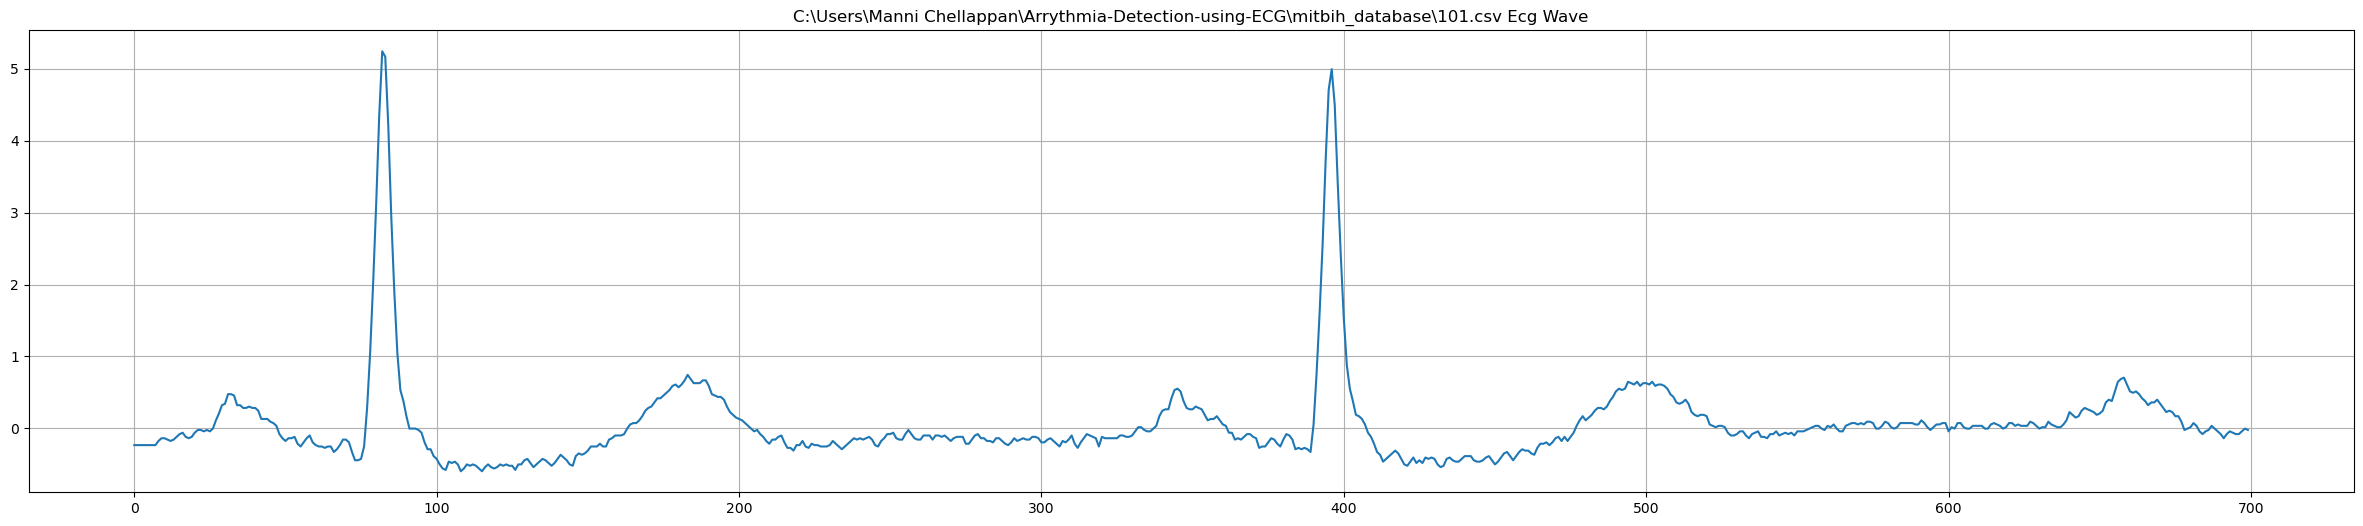

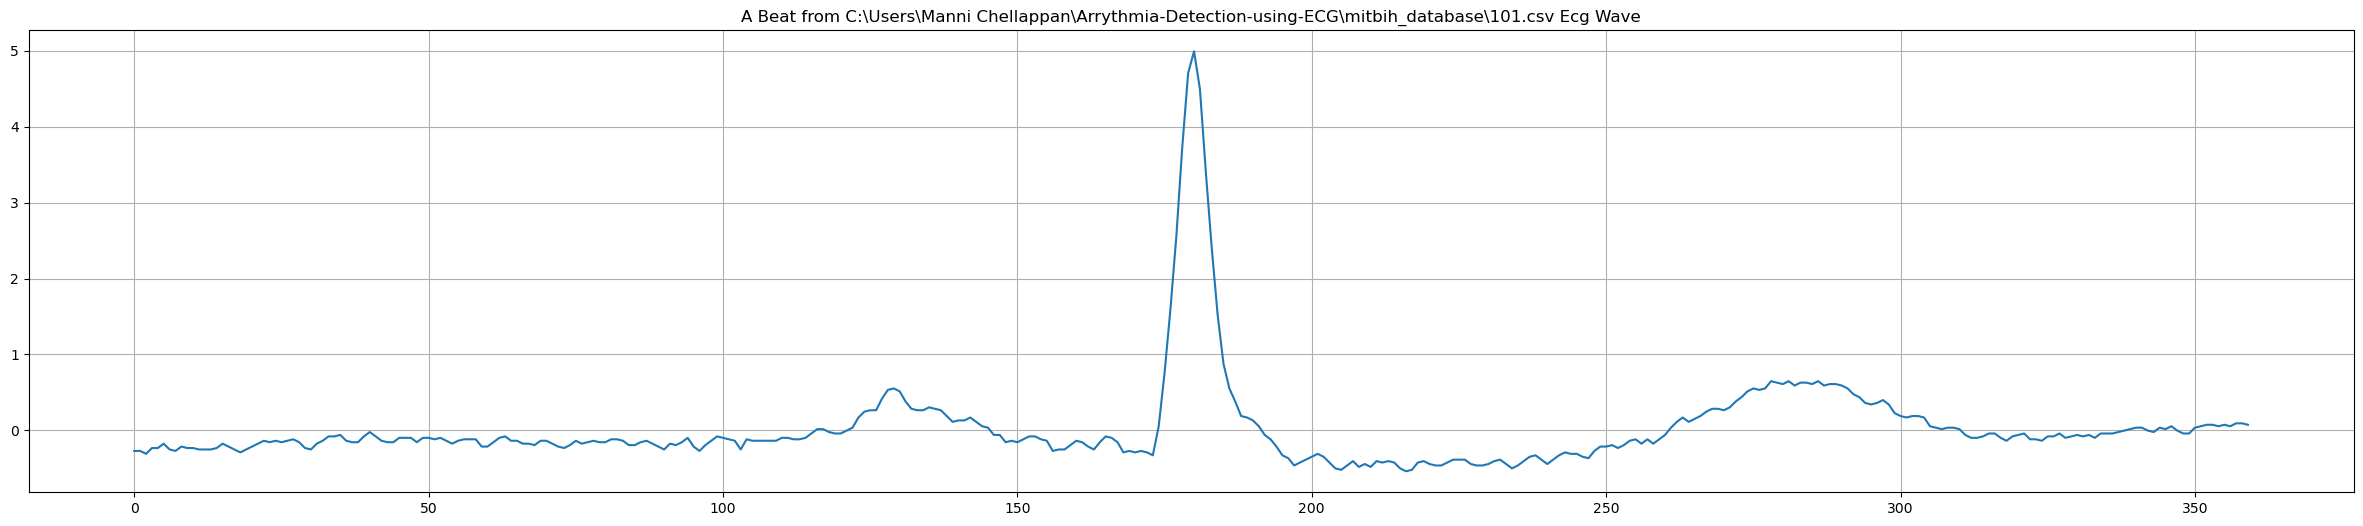

In [15]:
window_size = 180
for r in range(0, len(signaldata)):
    signals = []

    with open(signaldata[r], 'rt',) as csvfile:
        tempstorage = csv.reader(csvfile, delimiter=',',
                                 quotechar='|')
        insrtindx = -1
        for row in tempstorage:
            if(insrtindx >= 0):
                signals.insert(insrtindx, int(row[1]))
            insrtindx = insrtindx+1

    signals = stats.zscore(signals)

    if r == 1:
        plt_1 = plt.figure(figsize=(30, 6))
        plt.grid()

        plt.title(signaldata[1] + " Ecg Wave")

        plt.plot(signals[0:700])
        plt.show()
        sc=signals

    boolvar = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)):
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted)
            pos = int(next(splitted))
            class_type = next(splitted)
            if(class_type in classnames):
                c_ind = classnames.index(class_type)

                count_classes[c_ind] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]
                    if r == 1 and not boolvar:
                        plt_1 = plt.figure(figsize=(30, 6))
                        plt.grid()
                        plt.title("A Beat from " + signaldata[1] + " Ecg Wave")
                        plt.plot(beat)
                        plt.show()
                        boolvar = True

                    X.append(beat)
                    y.append(c_ind)


In [16]:
for i in range(0,len(X)):
        X[i] = np.append(X[i], y[i])

print(np.shape(X))


(95053, 361)


0.0    72312
2.0     7255
4.0     6870
1.0     6070
3.0     2546
Name: 360, dtype: int64


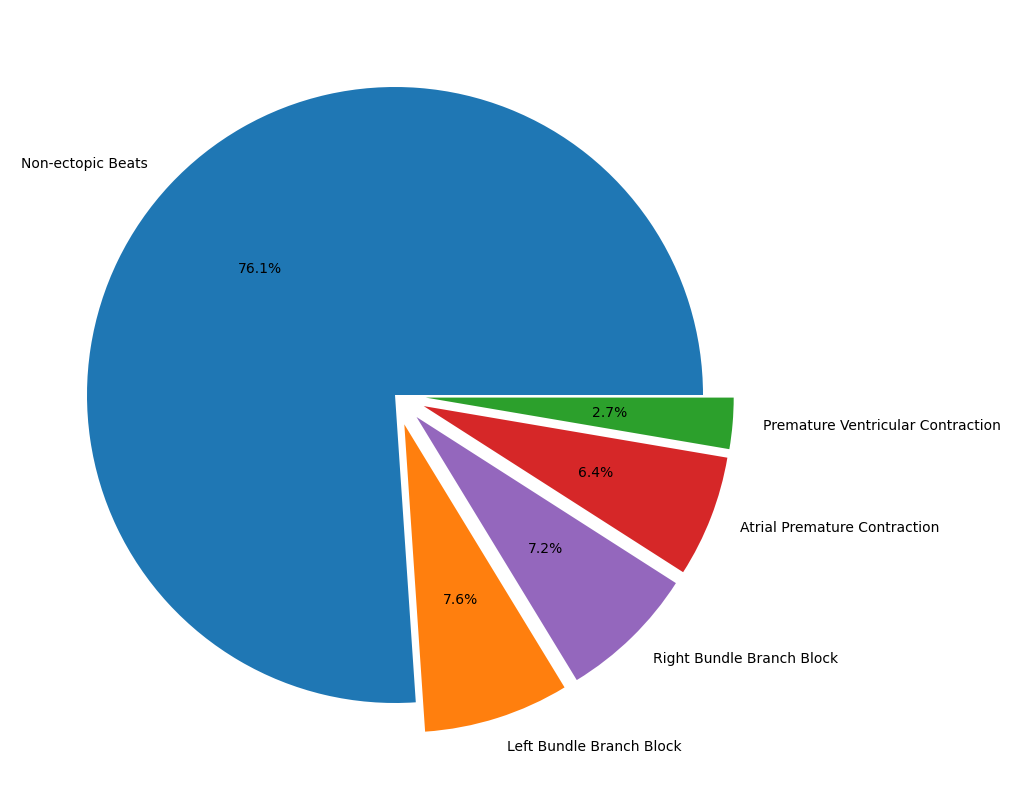

In [17]:
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
explode=(0,0.1,0.1,0.1,0.1)
plt.pie(per_class, labels=['Non-ectopic Beats', 'Left Bundle Branch Block', 'Right Bundle Branch Block', 'Atrial Premature Contraction', 'Premature Ventricular Contraction'],explode=explode, colors=['tab:blue','tab:orange','tab:purple','tab:red','tab:green'],autopct='%1.1f%%')
plt.show()

In [18]:
target=X_train_df.shape[1]-1
df_0=X_train_df[X_train_df[target]==0]
df_1=X_train_df[X_train_df[target]==1]
df_2=X_train_df[X_train_df[target]==2]
df_3=X_train_df[X_train_df[target]==3]
df_4=X_train_df[X_train_df[target]==4]

In [19]:
countclassno=2500



df_0_undersample=df_0.sample(countclassno,replace=True)

df_1_undersample=df_1.sample(countclassno,replace=True)
df_2_undersample=df_2.sample(countclassno,replace=True)
df_3_undersample=df_3.sample(countclassno,replace=True)
df_4_undersample=df_4.sample(countclassno,replace=True)

X_train_df=pd.concat([df_0_undersample,df_1_undersample,df_2_undersample,df_3_undersample,df_4_undersample])

0.0    2500
1.0    2500
2.0    2500
3.0    2500
4.0    2500
Name: 360, dtype: int64


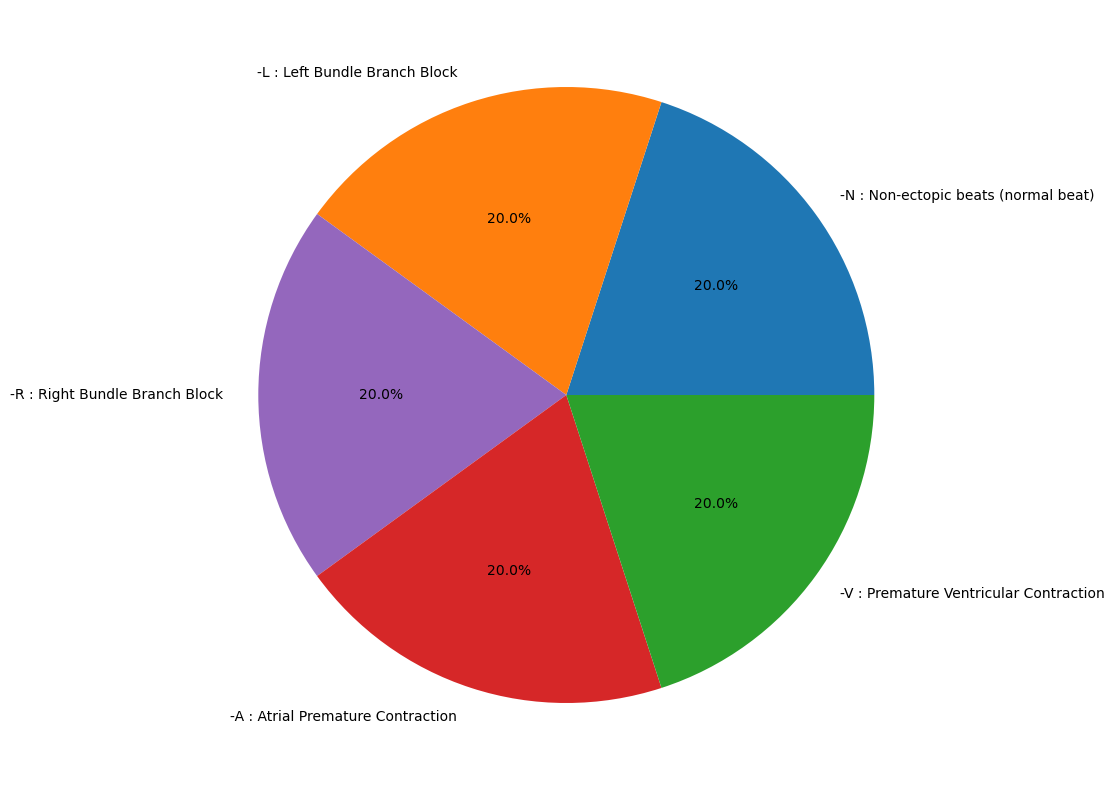

In [20]:
class_dist = X_train_df[X_train_df.shape[1]-1].value_counts()
print(class_dist)
plt.figure(figsize=(20,10))

plt.pie(class_dist, labels=['-N : Non-ectopic beats (normal beat) ', '-L : Left Bundle Branch Block ', '-R : Right Bundle Branch Block ', '-A : Atrial Premature Contraction ', '-V : Premature Ventricular Contraction'], colors=['tab:blue','tab:orange','tab:purple','tab:red','tab:green'],autopct='%1.1f%%')

plt.show()

In [21]:
train, test = train_test_split(X_train_df, test_size=0.20,random_state=45637)

print("X_train : ", np.shape(train))
print("X_test  : ", np.shape(test))

X_train :  (10000, 361)
X_test  :  (2500, 361)


In [22]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

(10000, 5) (2500, 5)


In [23]:
train_y

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [24]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(10000, 360, 1) (2500, 360, 1)


In [25]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(360, 1)))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
model.add(Softmax())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 360, 16)           224       
                                                                 
 average_pooling1d (Average  (None, 179, 16)           0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 179, 64)           17472     
                                                                 
 average_pooling1d_1 (Avera  (None, 89, 64)            0         
 gePooling1D)                                                    
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 128)           155776    
                                                                 
 average_pooling1d_2 (Avera  (None, 44, 128)           0

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [27]:
modelbase = model.fit(train_x, train_y, batch_size=36, epochs=10, verbose=1, validation_data=(test_x, test_y))

Epoch 1/10
278/278 [==============================] - 29s 87ms/step - loss: 0.3815 - accuracy: 0.8784 - val_loss: 0.1865 - val_accuracy: 0.9456
Epoch 2/10
278/278 [==============================] - 23s 83ms/step - loss: 0.1815 - accuracy: 0.9448 - val_loss: 0.1593 - val_accuracy: 0.9604
Epoch 3/10
278/278 [==============================] - 23s 82ms/step - loss: 0.1407 - accuracy: 0.9592 - val_loss: 0.1169 - val_accuracy: 0.9700
Epoch 4/10
278/278 [==============================] - 23s 82ms/step - loss: 0.1158 - accuracy: 0.9688 - val_loss: 0.1117 - val_accuracy: 0.9732
Epoch 5/10
278/278 [==============================] - 23s 83ms/step - loss: 0.0991 - accuracy: 0.9730 - val_loss: 0.1260 - val_accuracy: 0.9744
Epoch 6/10
278/278 [==============================] - 23s 83ms/step - loss: 0.0895 - accuracy: 0.9776 - val_loss: 0.0915 - val_accuracy: 0.9804
Epoch 7/10
278/278 [==============================] - 23s 83ms/step - loss: 0.0854 - accuracy: 0.9802 - val_loss: 0.1089 - val_accuracy:

In [28]:
model.save("modelecg.h5")
print("Saved model to disk")

Saved model to disk


C:\Users\Manni Chellappan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


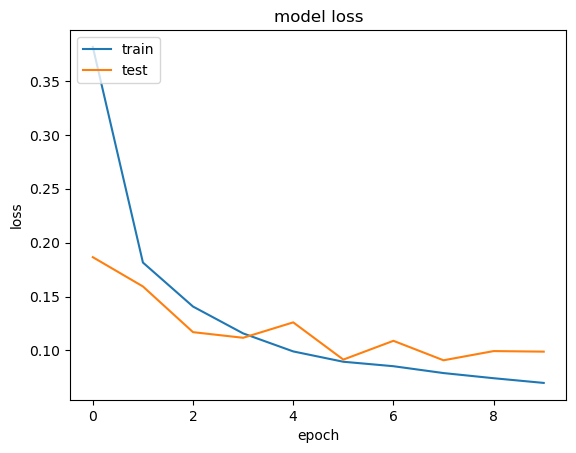

In [29]:
plt.plot(modelbase.history['loss'])
plt.plot(modelbase.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

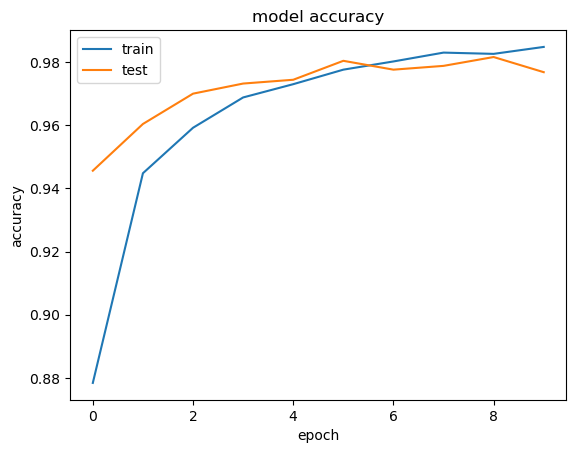

In [30]:
plt.plot(modelbase.history['accuracy'])
plt.plot(modelbase.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
score = model.evaluate(test_x, test_y)
y_pred=model.predict(test_x)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 2s 24ms/step
Test Loss: 0.09887935221195221
Test accuracy: 0.9768000245094299


Normalized confusion matrix


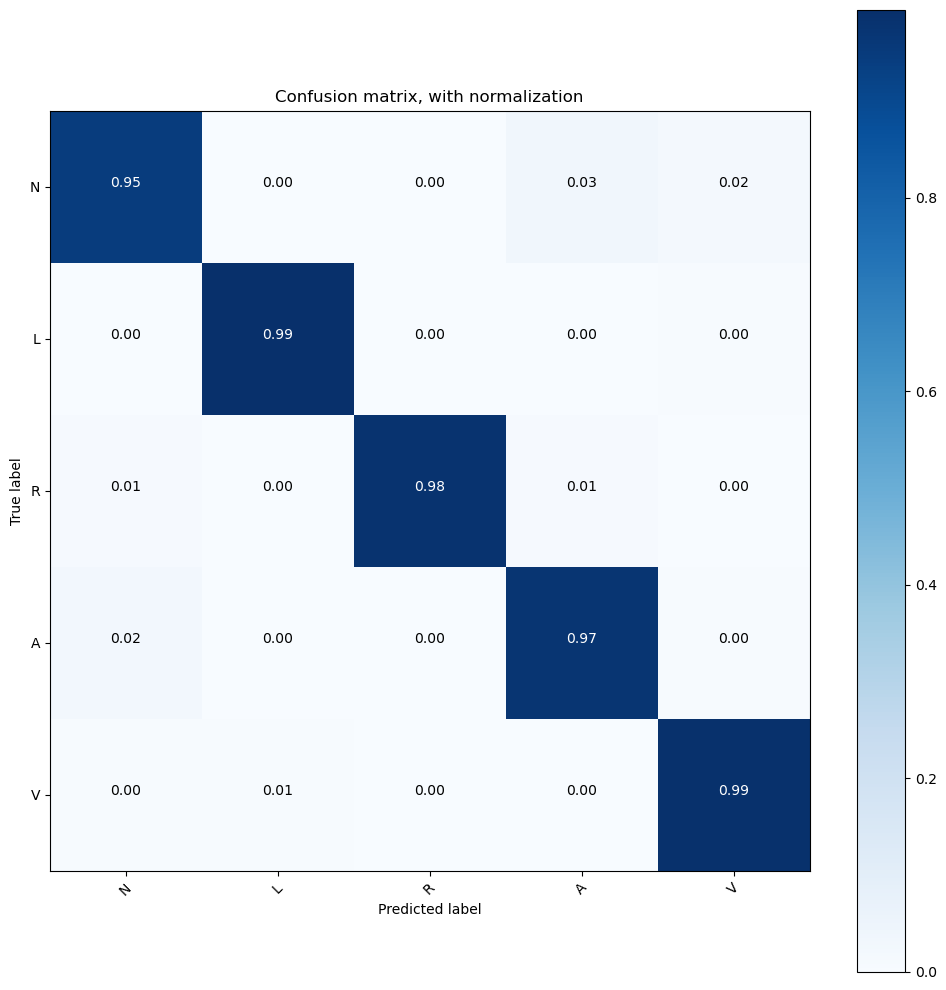

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'L', 'R', 'A', 'V'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [34]:

from sklearn.model_selection import StratifiedKFold
import numpy as np
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i in range(0,5):
	randomnum=np.random.randint(1,6456476)
	train, test = train_test_split(X_train_df, test_size=0.20,random_state=randomnum)

	

	target_train=train[train.shape[1]-1]
	target_test=test[test.shape[1]-1]
	train_y=to_categorical(target_train)
	test_y=to_categorical(target_test)

	train_x = train.iloc[:,:train.shape[1]-1].values
	test_x = test.iloc[:,:test.shape[1]-1].values
	train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
	test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
	print(np.shape(train_x), np.shape(test_x))
	model = Sequential()
	model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(360, 1)))
	model.add(AvgPool1D(pool_size=3, strides=2))
	model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))
	model.add(AvgPool1D(pool_size=3, strides=2))
	model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))
	model.add(AvgPool1D(pool_size=3, strides=2))
	model.add(Flatten())
	model.add(Dropout(0.5))
	model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
	model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
	model.add(Softmax())
# model.summary()
	model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])	# Fit the model
	model.fit(train_x, train_y, epochs=10, batch_size=36, verbose=1)
	scores = model.evaluate(test_x, test_y, verbose=1)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

(10000, 360, 1) (2500, 360, 1)
Epoch 1/10
278/278 [==============================] - 24s 75ms/step - loss: 0.4014 - accuracy: 0.8726
Epoch 2/10
278/278 [==============================] - 21s 76ms/step - loss: 0.1880 - accuracy: 0.9423
Epoch 3/10
278/278 [==============================] - 21s 76ms/step - loss: 0.1379 - accuracy: 0.9590
Epoch 4/10
278/278 [==============================] - 21s 76ms/step - loss: 0.1152 - accuracy: 0.9685
Epoch 5/10
278/278 [==============================] - 21s 77ms/step - loss: 0.1019 - accuracy: 0.9736
Epoch 6/10
278/278 [==============================] - 21s 76ms/step - loss: 0.0960 - accuracy: 0.9746
Epoch 7/10
278/278 [==============================] - 22s 77ms/step - loss: 0.0808 - accuracy: 0.9815
Epoch 8/10
278/278 [==============================] - 22s 78ms/step - loss: 0.0791 - accuracy: 0.9808
Epoch 9/10
278/278 [==============================] - 21s 77ms/step - loss: 0.0722 - accuracy: 0.9825
Epoch 10/10
79/79 [==============================] 